## Import required libraries

In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:\\Users\\DELL\\Desktop\\Traffic_Signs_WebApp-master')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [81]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [82]:
cur_path

'C:\\Users\\DELL\\Desktop\\Traffic_Signs_WebApp-master'

## Preprocess the images

In [83]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [84]:
data = np.array(data)
labels = np.array(labels)

In [85]:
directory = './training'
if not os.path.exists(directory):
    os.makedirs(directory)

# Now you can save your data
np.save(os.path.join(directory, 'data.npy'), data)
np.save(os.path.join(directory, 'target.npy'), labels)

## Save Labels & Data for future use

In [86]:
import numpy as np
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [87]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [89]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [90]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [91]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.0695 - loss: 4.2343 - val_accuracy: 0.6960 - val_loss: 1.3413
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.6225 - loss: 1.3042 - val_accuracy: 0.9086 - val_loss: 0.3560
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.8139 - loss: 0.6269 - val_accuracy: 0.9447 - val_loss: 0.2028
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.8682 - loss: 0.4490 - val_accuracy: 0.9337 - val_loss: 0.2371
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 60s 61ms/step - accuracy: 0.9006 - loss: 0.3381 - val_accuracy: 0.9561 - val_loss: 0.1543
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.9145 - loss: 0.2964 - val_accuracy: 0.9768 - val_loss: 0.0881
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 65s 66ms/step - accuracy: 0.9285 - loss: 0.2520 - val_accuracy: 0.9778 - val_loss: 0.0840
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9375 - loss: 0.2176 - 

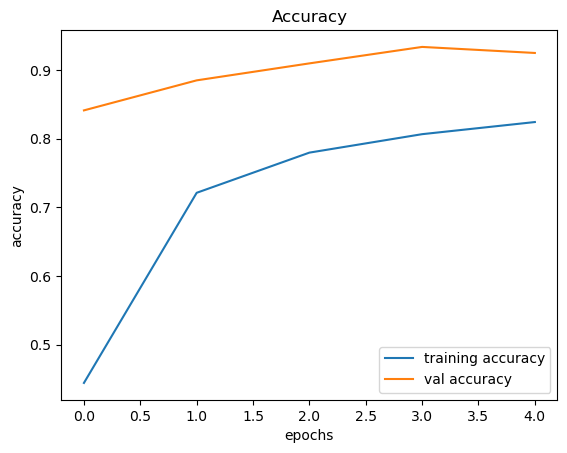

In [17]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

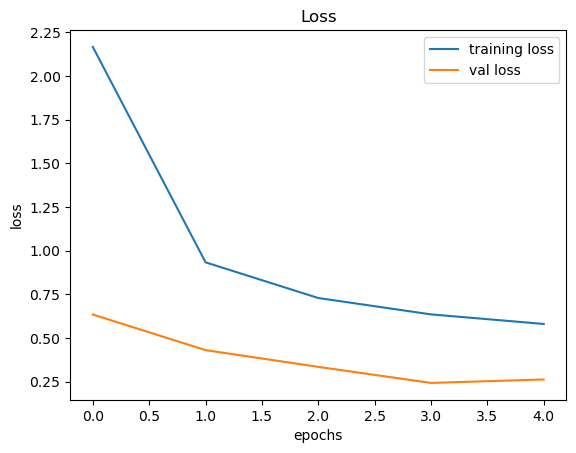

In [18]:

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# testing 

In [94]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [95]:
X_test, label = testing('Test.csv')


In [96]:
# Assuming model is your trained Sequential model
Y_pred_probabilities = model.predict(X_test)
Y_pred = np.argmax(Y_pred_probabilities, axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step


## Accuracy

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.8702296120348377


In [99]:
model.save("./training/TSR.h5")


In [56]:
# Save the model in the native Keras format
model.save("./training/TSR.keras")


In [100]:
import os
os.chdir(r'C:\\Users\\DELL\\Desktop\\Traffic_Signs_WebApp-master')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [101]:

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted traffic sign is: Speed limit (30km/h)


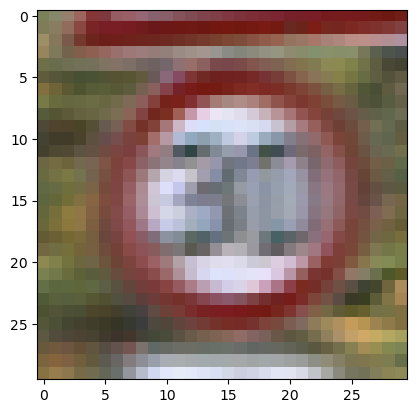

In [108]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred_probabilities = model.predict(X_test)
    predicted_class_index = np.argmax(Y_pred_probabilities)
    return image, predicted_class_index

plot, predicted_class_index = test_on_img(r'C:\\Users\\DELL\\Desktop\\Traffic_Signs_WebApp-master/Test/00110.png')
predicted_class = classes[predicted_class_index]
print("Predicted traffic sign is:", predicted_class)
plt.imshow(plot)
plt.show()


In [76]:
#path check 

import os

# Specify the path to the file or directory you want to check permissions for
file_path = 'C:\\Users\\DELL\\Desktop\\Traffic_Signs_WebApp-master/0_9960_1577671998.6182477.png'
# Check if the file exists

if os.path.exists(file_path):
    # Get the permissions of the file
    permissions = os.stat(file_path).st_mode

    # Check if the file is readable
    if os.access(file_path, os.R_OK):
        print("File is readable")
    else:
        print("File is not readable")

    # Check if the file is writable
    if os.access(file_path, os.W_OK):
        print("File is writable")
    else:
        print("File is not writable")

    # Check if the file is executable
    if os.access(file_path, os.X_OK):
        print("File is executable")
    else:
        print("File is not executable")
else:
    print("File does not exist")


File is readable
File is writable
File is executable
